In [133]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [134]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\behavioural_study.csv")
df.head()   

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [135]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [137]:
df.shape

(99, 13)

In [138]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [139]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

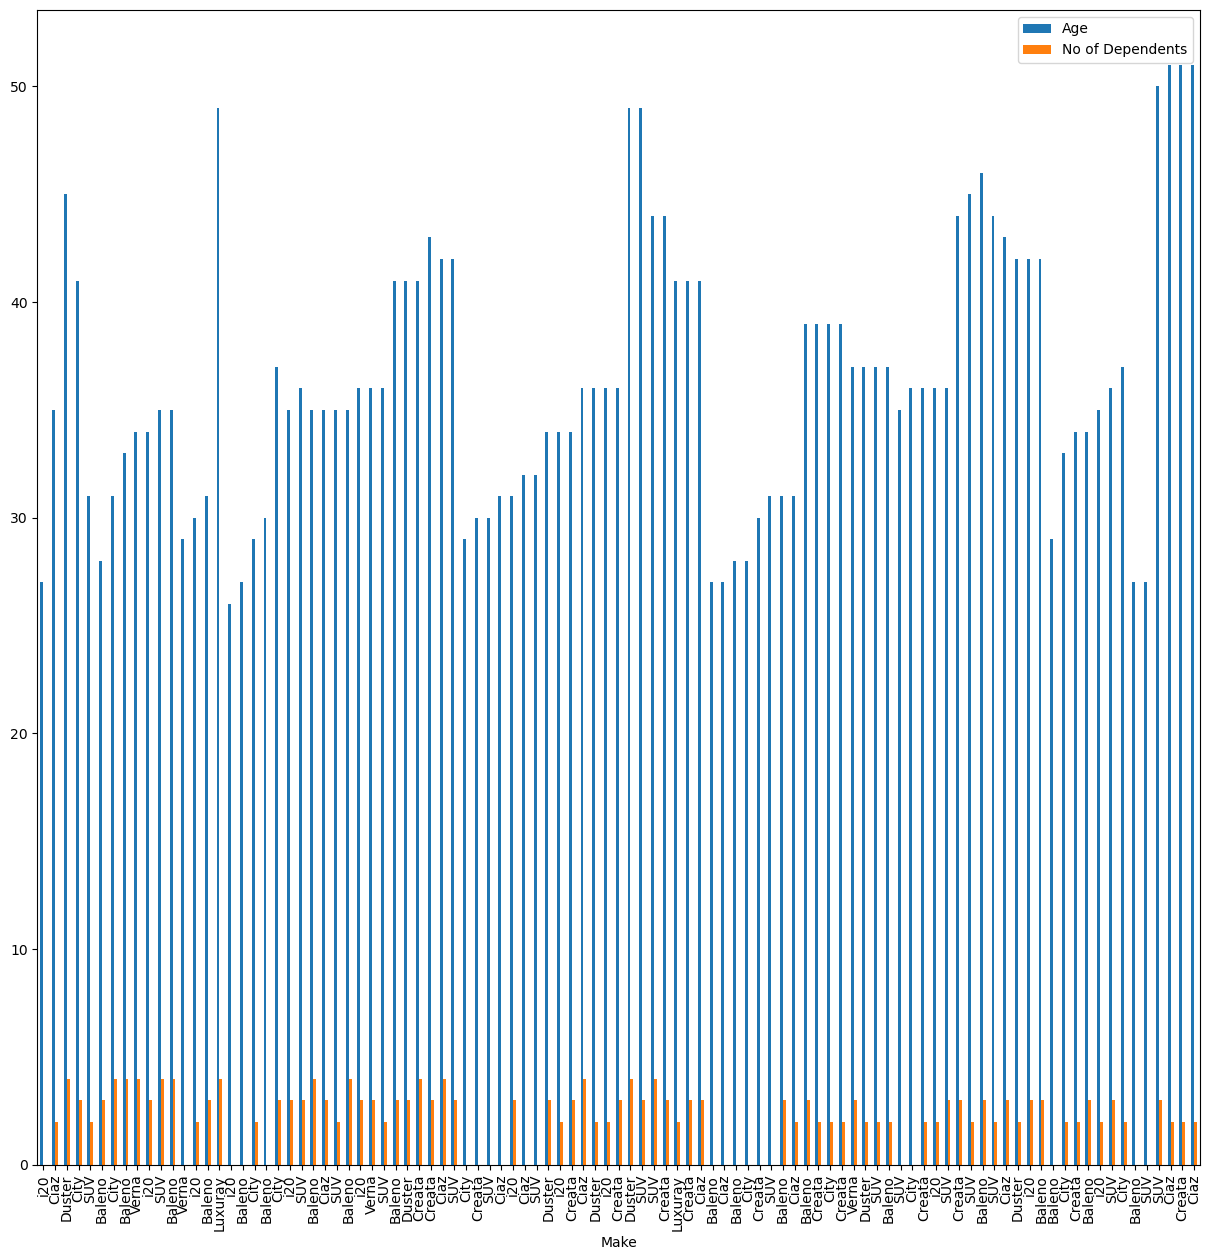

In [140]:
df.plot(x="Make", y=['Age','No of Dependents'], kind="bar", figsize=(15,15))
plt.show()

C:\Users\Dell\anaconda3\envs\testing\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


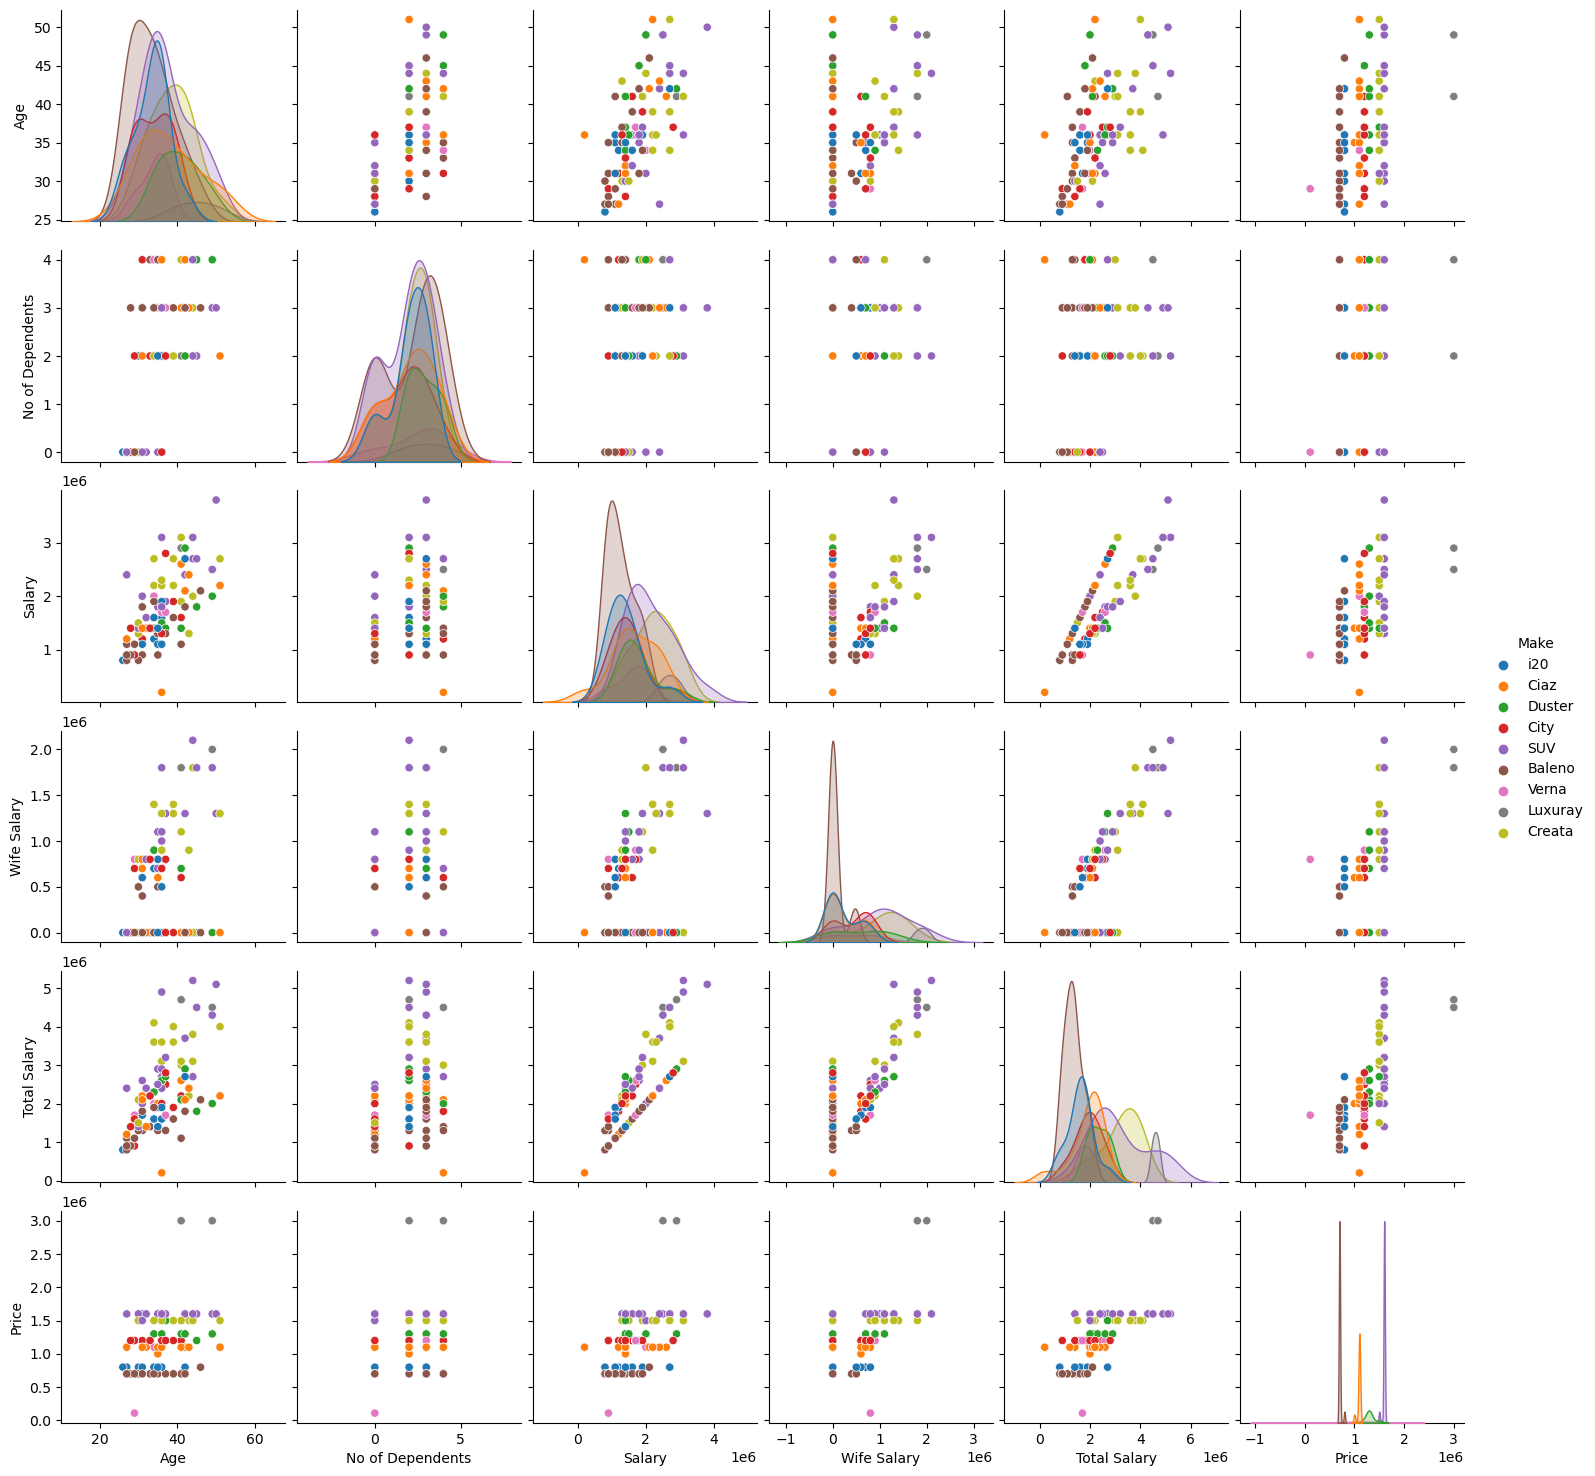

In [141]:
sns.pairplot(df, hue='Make', size=2.5);

<AxesSubplot: xlabel='Make', ylabel='count'>

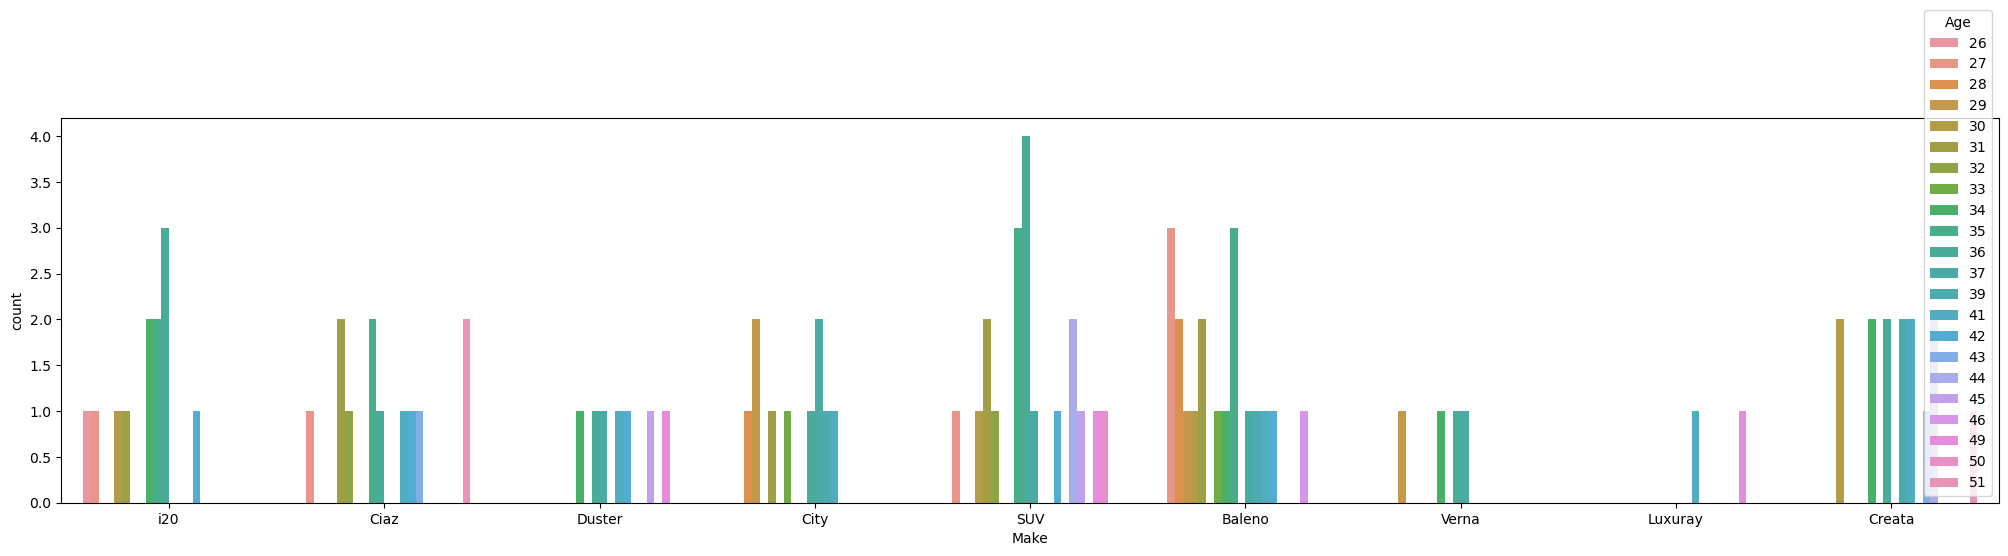

In [142]:
plt.figure(figsize=(25,5))
sns.countplot(x="Make", data=df, hue="Age")

<AxesSubplot: xlabel='Make', ylabel='count'>

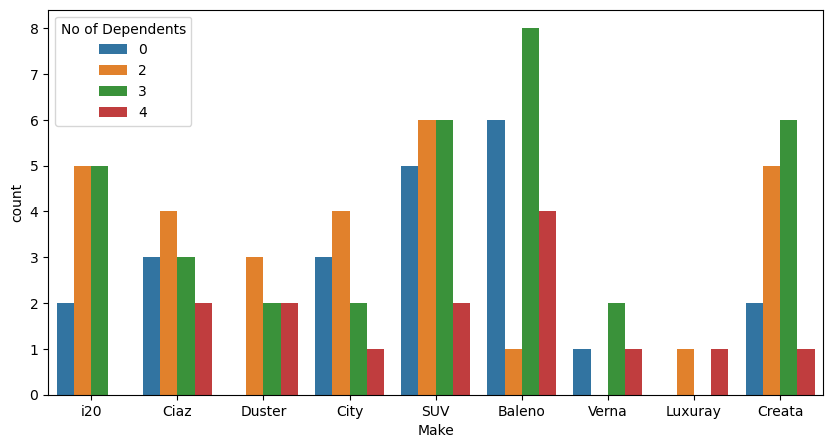

In [143]:
plt.figure(figsize=(10,5))
sns.countplot(x="Make", data=df, hue="No of Dependents")

<AxesSubplot: xlabel='Make', ylabel='count'>

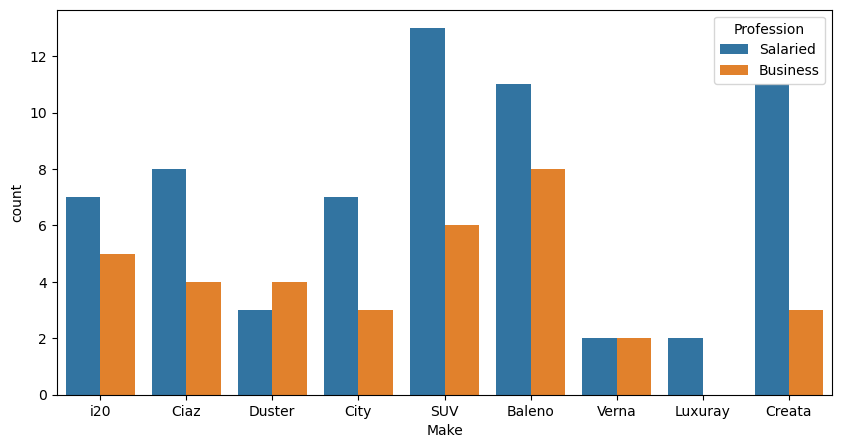

In [144]:
plt.figure(figsize=(10,5))
sns.countplot(x="Make", data=df, hue="Profession")

<AxesSubplot: xlabel='Make', ylabel='count'>

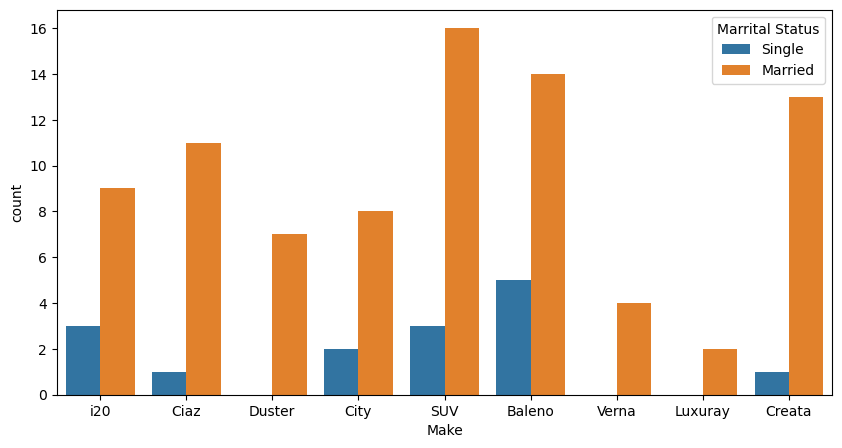

In [145]:
plt.figure(figsize=(10,5))
sns.countplot(x="Make", data=df, hue="Marrital Status")

<AxesSubplot: xlabel='Make', ylabel='count'>

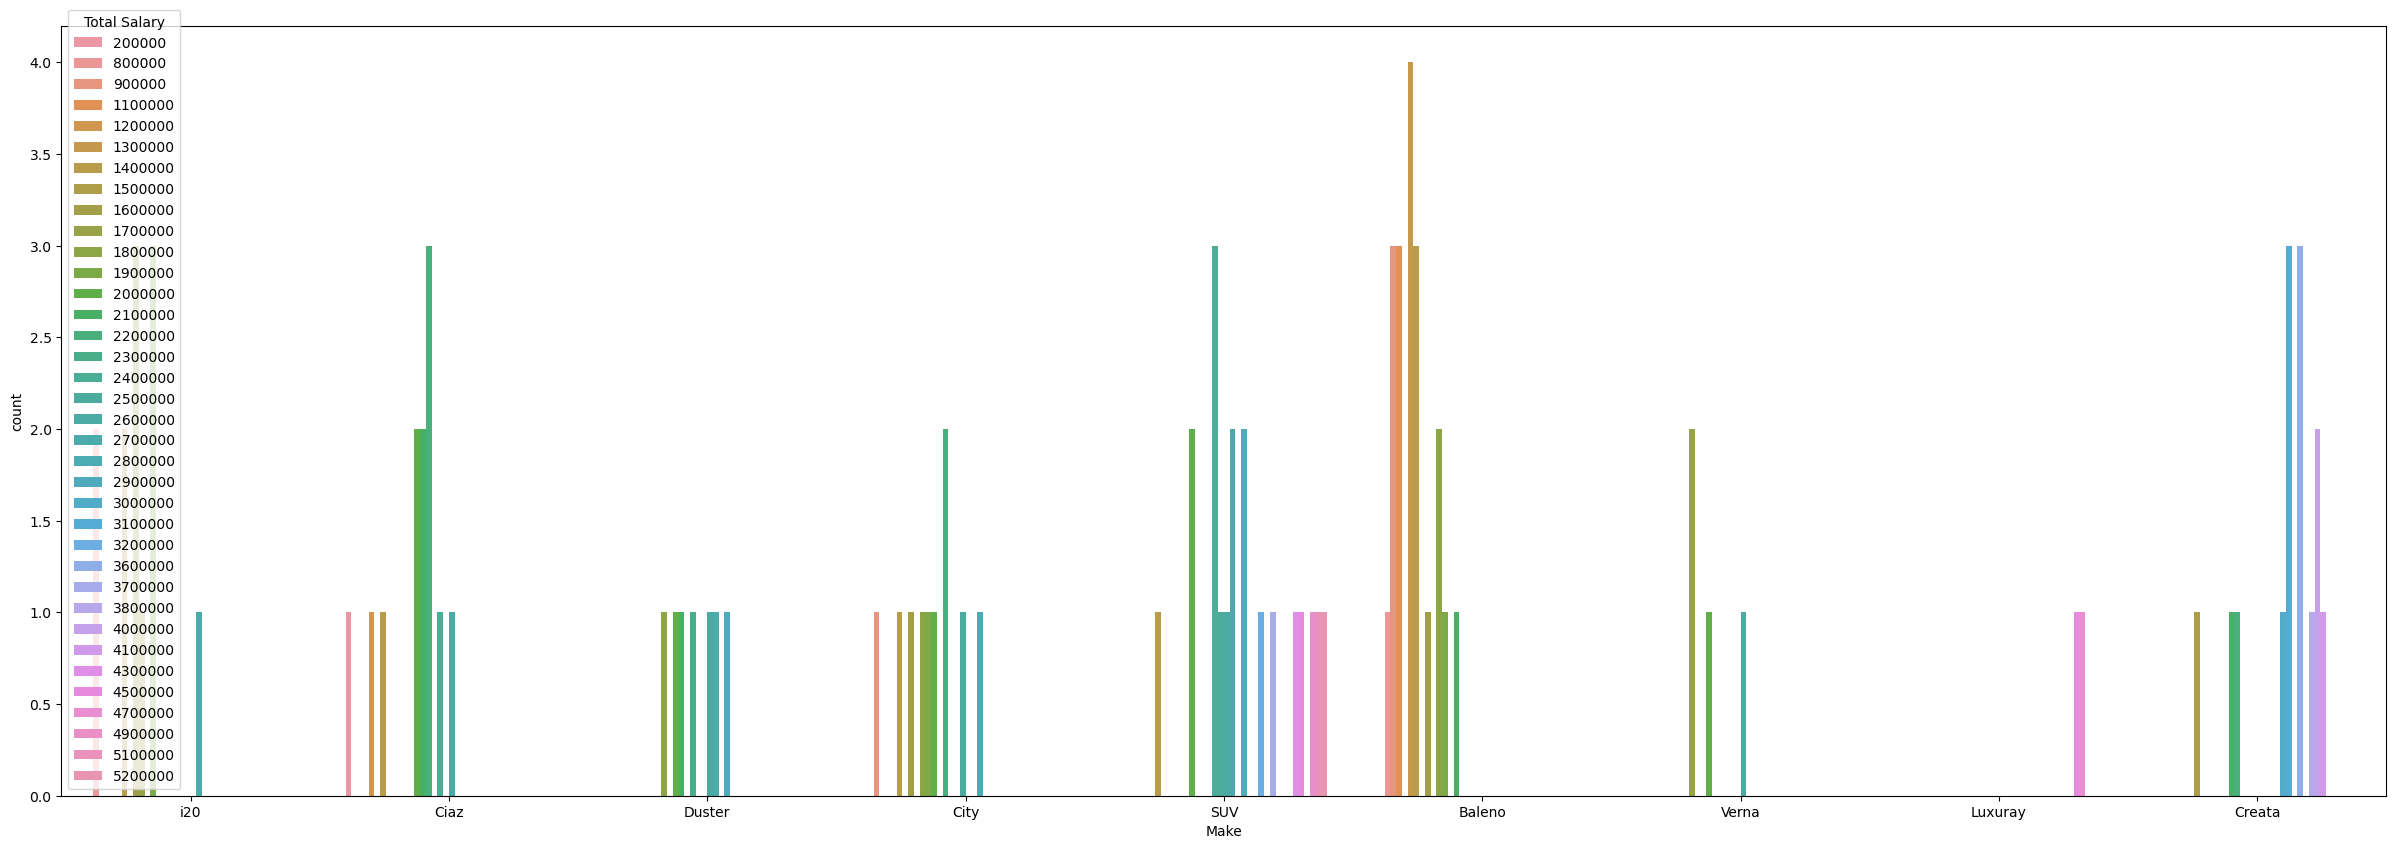

In [146]:
plt.figure(figsize=(30,10))
sns.countplot(x="Make", data=df, hue="Total Salary")

<AxesSubplot: xlabel='Make', ylabel='count'>

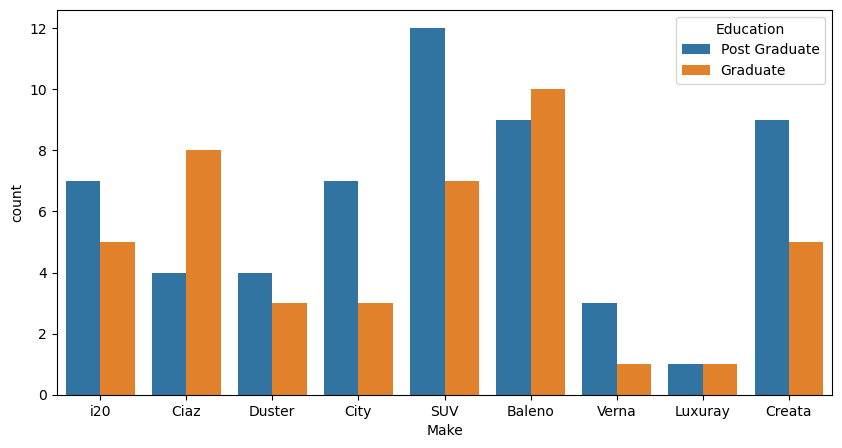

In [147]:
plt.figure(figsize=(10,5))
sns.countplot(x="Make", data=df, hue="Education")

C:\Users\Dell\AppData\Local\Temp\ipykernel_3224\1073153595.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

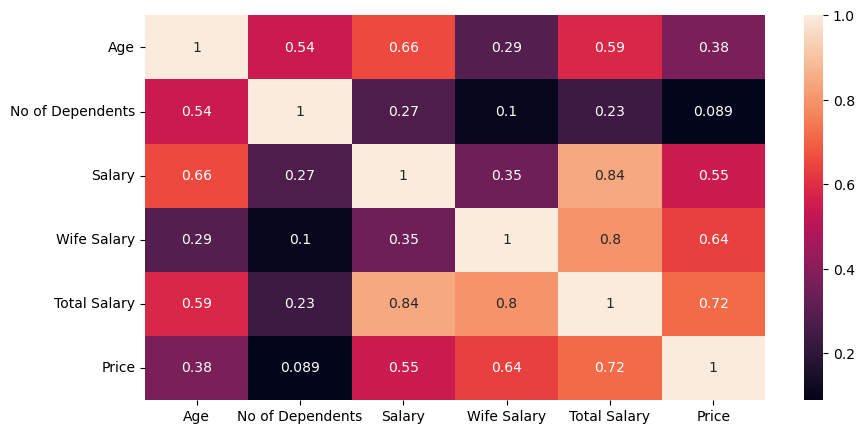

In [148]:
ax= plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

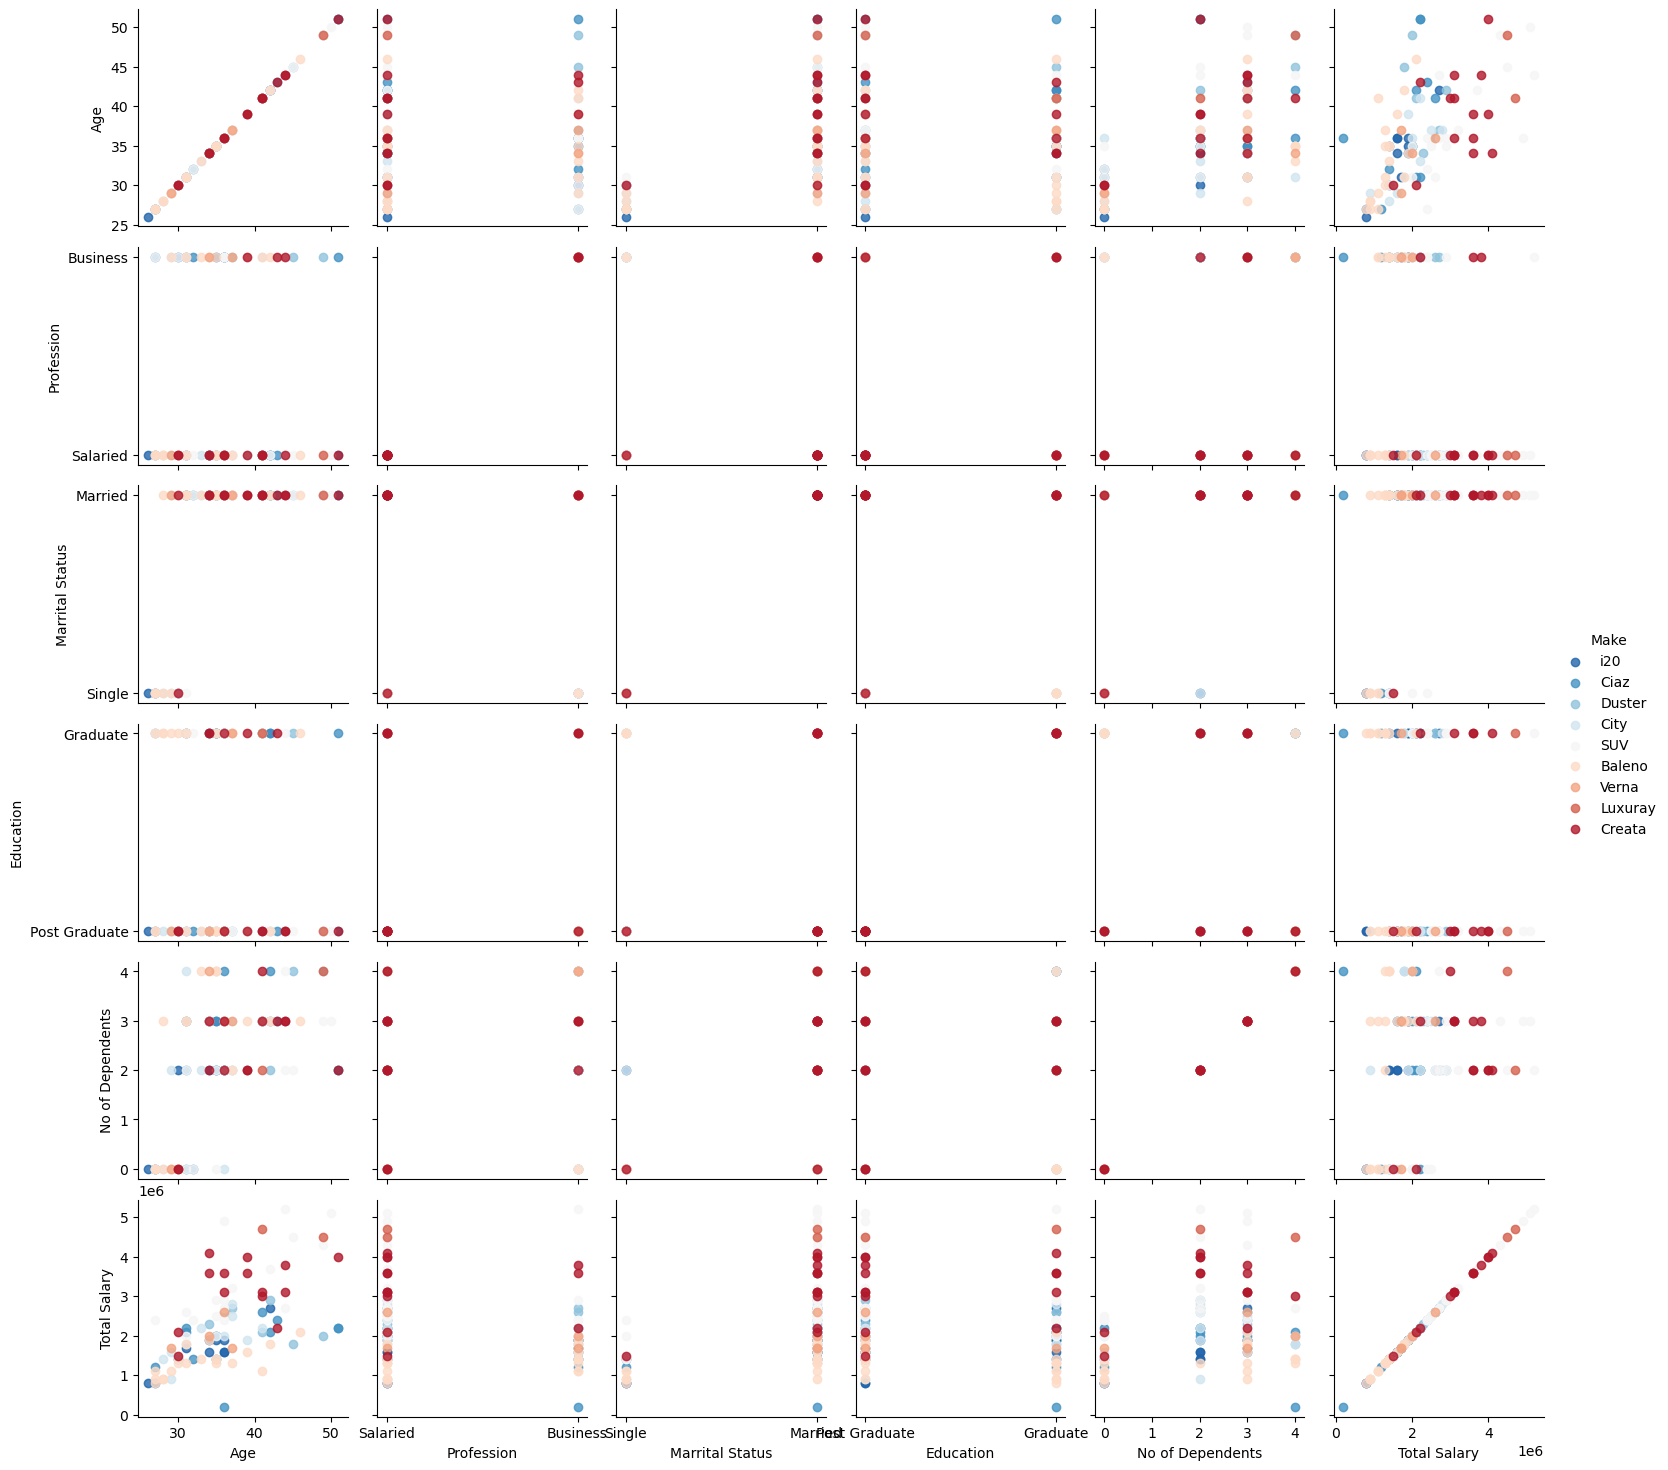

In [149]:
pg= sns.PairGrid(df, vars=['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Total Salary'],
                 hue='Make', palette='RdBu_r')
pg.map(plt.scatter, alpha=0.8)
pg.add_legend();

In [150]:
df=df.replace(to_replace ="m", value ="No")
df.loc[11]

Age                       35
Profession          Salaried
Marrital Status      Married
Education           Graduate
No of Dependents           4
Personal loan            Yes
House Loan               Yes
Wife Working              No
Salary               1400000
Wife Salary                0
Total Salary         1400000
Make                  Baleno
Price                 700000
Name: 11, dtype: object

In [151]:
df2=df.drop(["Age","No of Dependents",  "Salary" ,"Wife Salary","Total Salary","Make","Price"],axis=1)


In [152]:
df2['Profession']=df2['Profession'].replace(['Salaried', 'Business'],[0, 1])
df2['Marrital Status']=df2['Marrital Status'].replace(['Single', 'Married'],[0, 1])
df2['Education']=df2['Education'].replace(['Graduate','Post Graduate'],[0, 1])
df2['Personal loan']=df2['Personal loan'].replace(['No', 'Yes'],[0, 1])
df2['House Loan']=df2['House Loan'].replace(['No', 'Yes'],[0, 1])
df2['Wife Working']=df2['Wife Working'].replace(['No', 'Yes'],[0, 1])
print(df2)









    Profession  Marrital Status  Education  Personal loan  House Loan  \
0            0                0          1              1           0   
1            0                1          1              1           1   
2            1                1          0              1           1   
3            1                1          1              0           0   
4            0                1          1              1           0   
..         ...              ...        ...            ...         ...   
94           1                0          0              0           0   
95           0                1          1              0           0   
96           1                1          0              1           1   
97           0                1          1              0           0   
98           0                1          1              1           1   

    Wife Working  
0              0  
1              1  
2              0  
3              1  
4              1  
..       

In [153]:
wcss=[]
for i in range(1,11):
    #preventing random initialization: 'init=k-means++'
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)

C:\Users\Dell\anaconda3\envs\testing\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\envs\testing\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\envs\testing\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\envs\testing\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

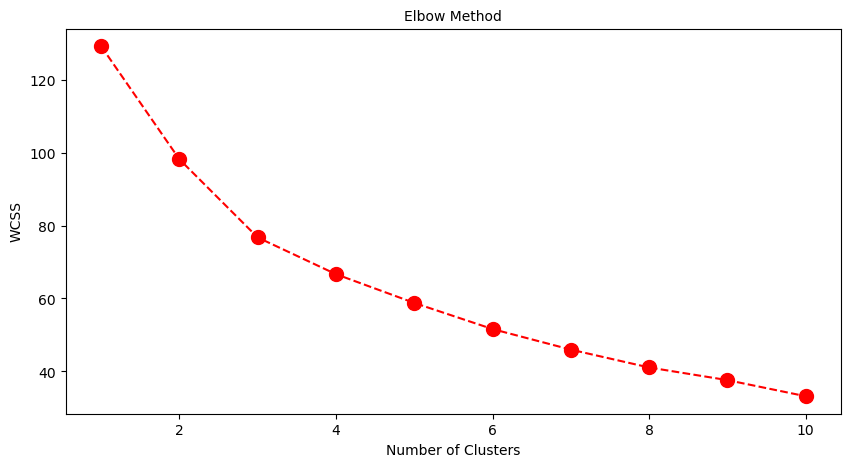

In [154]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,color='red', linestyle='dashed', marker='o',
          markersize=10)
plt.title('Elbow Method', size=10)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [155]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(df2)
y_kmeans

C:\Users\Dell\anaconda3\envs\testing\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\envs\testing\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 0, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1,
       0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1,
       1, 0, 2, 0, 0, 2, 2, 1, 0, 1, 0])

In [156]:
df['cluster']=y_kmeans
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,cluster
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,2
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,0
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,0
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,1
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,1


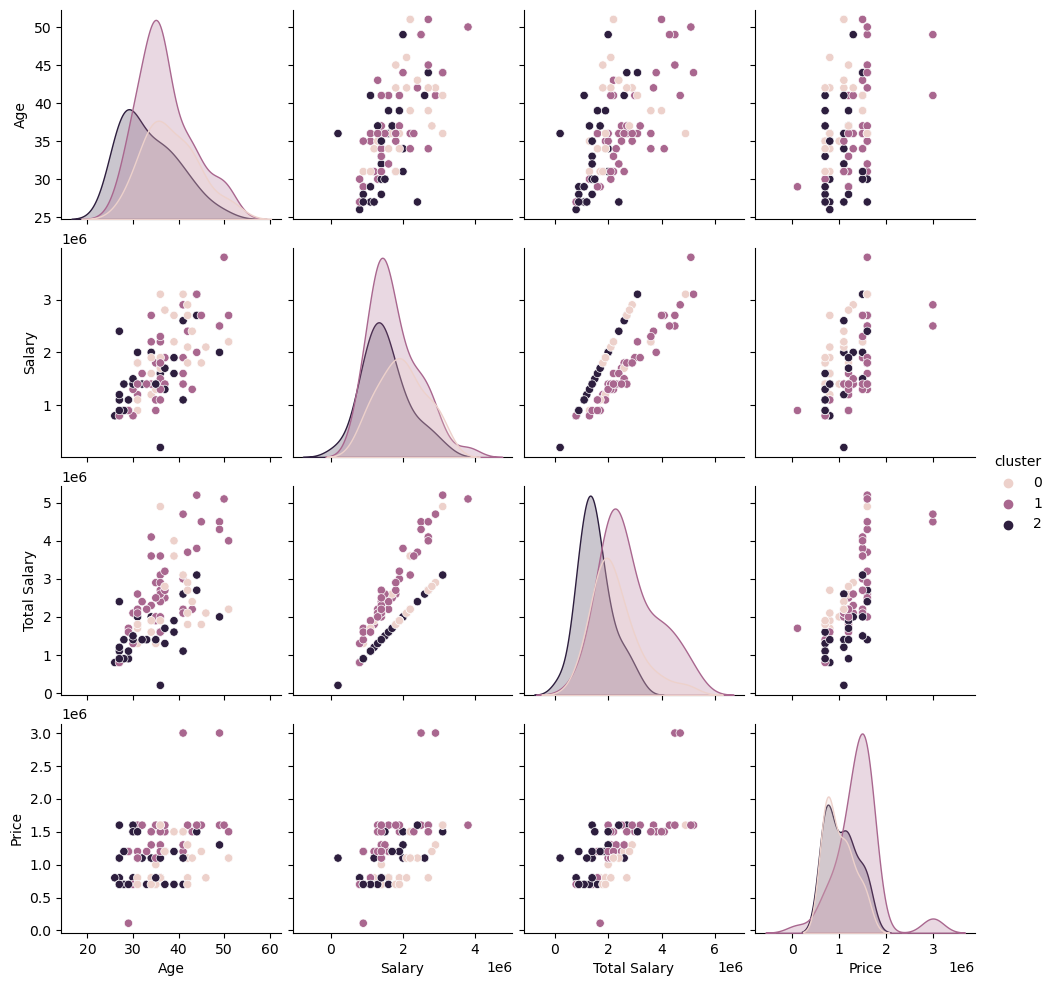

In [157]:
sns.pairplot(df,x_vars = ['Age','Salary','Total Salary','Price'], y_vars = ['Age','Salary','Total Salary','Price'], hue='cluster')